# Simple Linear Regression

This notebook demonstrates a linear regression implementation without relying on high-level libraries such as `sklearn`. We'll utilize the gradient descent optimization algorithm to estimate the parameters of our regression model.

## Required Libraries

In [408]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import pdb (for debugging process)
from sklearn.preprocessing import StandardScaler

# Adjust the visualizer size
plt.rcParams['figure.figsize'] = [15, 7]

# Load dataset


In [409]:
dataset = pd.read_csv("../datasets/Housing_Data.csv")
dataset.head()

,Size(Sq. Ft),Price
0,477,50367
1,496,61683
2,524,63517
3,571,63755
4,770,66702


# Separate independent (X) and dependent (Y) variables

Separate independent (X) and dependent (Y) variables and convert them to NumPy array

In [410]:
# Separate independent (X) and dependent (Y) variables
indepX = dataset.iloc[:, 0].values  # Convert to NumPy array
depY = dataset.iloc[:, 1].values  # Convert to NumPy array

In [411]:
# Reshape the data if necessary
indepX = indepX.reshape(-1, 1)  # Ensure it's 2D
depY = depY.reshape(-1, 1)      # Ensure it's 2D

In [412]:
# Scaling
scale =  StandardScaler()
indepX = scale.fit_transform(indepX)
depY = scale.fit_transform(depY)

# Hypothesis Function

The hypothesis function can be represented mathematically as follows:

$$
h_\theta(x) = \theta_0 + \theta_1 \cdot x
$$

Where:
- $ \theta_0 $: The intercept term (bias).
- $ \theta_1 $: The coefficient of $ x $ (slope).
- $ x $: The input feature.

The corresponding Python implementation:

```python
def hyp(theta, x):
    return theta[0] + theta[1] * x


In [413]:
# Hypothesis function
def hyp(theta, x):
    return theta[0] + theta[1] * x

# Gradient Computation Function

The gradient computation for updating the parameters of the hypothesis function is given by:

$$
\text{grad}_0 = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)
$$

$$
\text{grad}_1 = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}
$$

Where:
- $ m $: The number of samples.
- $ h_\theta(x^{(i)}) = \theta_0 + \theta_1 \cdot x^{(i)} $: The hypothesis function for the $ i $-th sample.
- $ y^{(i)} $: The actual output for the $ i $-th sample.
- $ x^{(i)} $: The input feature for the $ i $-th sample.
- $ \text{grad}_0 $ and $ \text{grad}_1 $: The gradients with respect to $ \theta_0 $ and $ \theta_1 $, respectively.

The corresponding Python implementation:

```python
def grad(x, y, theta, lr=1):
    grad = np.zeros(2)  # Gradient initialization
    m = len(x)  # Number of samples
    for i in range(m):
        error = hyp(theta, x[i]) - y[i]
        grad[0] += error
        grad[1] += error * x[i]
    grad /= m  # Average gradient
    return grad


In [414]:
# Gradient computation function
def grad(x, y, theta, lr=1):
    grad = np.zeros(2)  # Gradient initialization
    m = len(x)  # Number of samples
    for i in range(m):
        error = hyp(theta, x[i]) - y[i]
        grad[0] += error
        grad[1] += error * x[i]
    grad /= m  # Average gradient
    return grad

In [415]:
# Initialize parameters
theta = np.zeros(2)  # [theta0, theta1]

theta

array([0., 0.])

In [416]:
# Compute gradient
g = grad(indepX, depY, theta)
print("Gradient:", g)

Gradient: [-7.54951657e-17 -9.78965664e-01]


C:\Users\DELL\AppData\Local\Temp\ipykernel_12992\3986406999.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[0] += error
C:\Users\DELL\AppData\Local\Temp\ipykernel_12992\3986406999.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[1] += error * x[i]


# Error Function

The error function (cost function) calculates the mean squared error for a given set of parameters ($ \theta $):

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$$

Where:
- $ m $: The number of samples.
- $ h_\theta(x^{(i)}) = \theta_0 + \theta_1 \cdot x^{(i)} $: The hypothesis function for the $ i $-th sample.
- $ y^{(i)} $: The actual output for the $ i $-th sample.

The corresponding Python implementation:

```python
def errorFun(theta, x, y):
    error = 0
    m = len(x)
    for i in range(m):
        error += (hyp(theta, x[i]) - y[i]) ** 2
    return error / (2 * m)


In [417]:
# Error Function
def errorFun(theta, x, y):
    error = 0
    m = len(x)
    for i in range(m):
        error += (hyp(theta, x[i]) - y[i]) ** 2
    return error / (2 * m)

# Gradient Function

To minimize the cost function, we calculate the gradient of $ J(\theta) $ with respect to $ \theta_0 $ and $ \theta_1 $:

$$
\frac{\partial J(\theta)}{\partial \theta_0} = -\frac{1}{m} \sum_{i=1}^{m} \left( y_i - h_\theta(x_i) \right)
$$

$$
\frac{\partial J(\theta)}{\partial \theta_1} = -\frac{1}{m} \sum_{i=1}^{m} \left( y_i - h_\theta(x_i) \right) x_i
$$

### Explanation:
- $ m $: The total number of training examples.
- $ y_i $: The actual value of the target variable for the $ i $-th example.
- $ h_\theta(x_i) $: The predicted value (hypothesis) for the $ i $-th example based on the current values of $ \theta_0 $ and $ \theta_1 $.
- $ x_i $: The input feature value for the $ i $-th example.

In [418]:
# Gradient Function
def grad(x, y, theta, lr):
    grad = np.zeros(2)
    m = len(x)
    for i in range(m):
        error = hyp(theta, x[i]) - y[i]
        grad[0] += error
        grad[1] += error * x[i]
    grad /= m  # Average gradient
    theta[0] -= lr * grad[0]
    theta[1] -= lr * grad[1]
    return theta

# Gradient Descent Algorithm
These gradients are used in the **Gradient Descent Algorithm** to iteratively update the parameters $ \theta_0 $ and $ \theta_1 $, reducing the value of the cost function $ J(\theta) $ until it converges to a minimum.

In [419]:
# Gradient Descent Function
def gradientDescent(x, y, ini_theta, lr, epochs):
    theta = ini_theta
    J = [0 for _ in range(epochs)]
    for i in range(epochs):
        theta = grad(x, y, theta, lr)
        J[i] = errorFun(theta, x, y)
    return theta, J

In [420]:
# Initial Parameters
theta = np.zeros(2)
learning_rate = 0.01
epochs = 400

In [421]:
# Perform Gradient Descent
ntheta, cost = gradientDescent(indepX, depY, theta, learning_rate, epochs)
print("Optimized Theta:", ntheta)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12992\3430482010.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[0] += error
C:\Users\DELL\AppData\Local\Temp\ipykernel_12992\3430482010.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[1] += error * x[i]


Optimized Theta: [1.11732845e-16 9.61392688e-01]


In [422]:
# Hypothesis (Predictions)
H = hyp(ntheta, indepX)

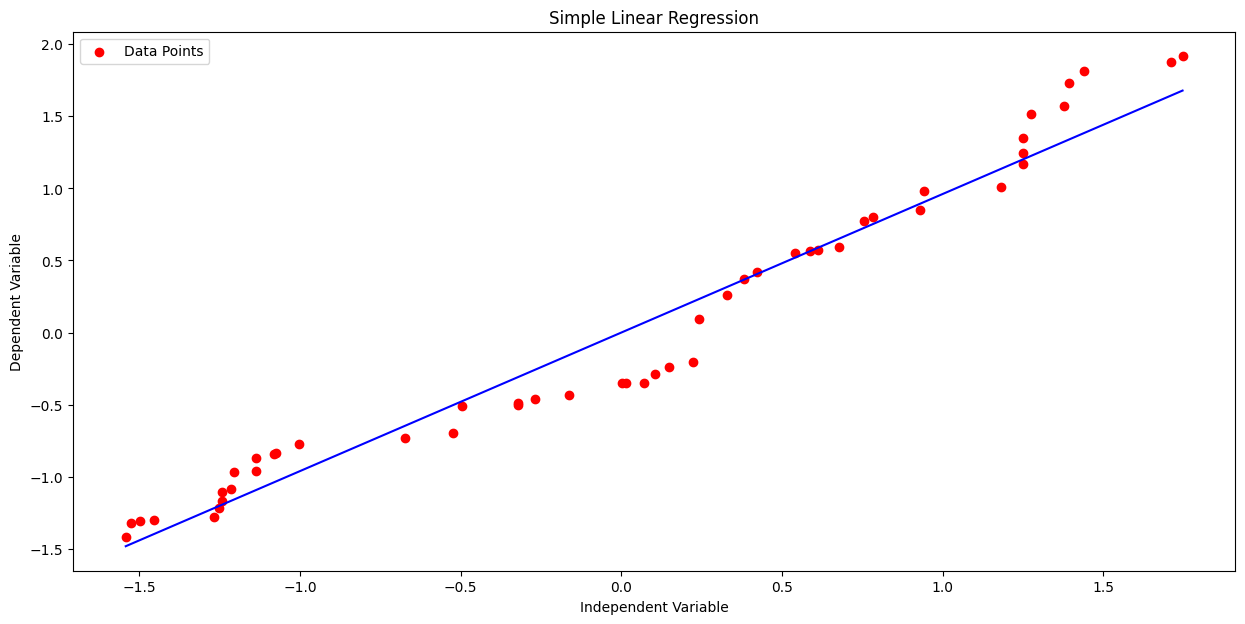

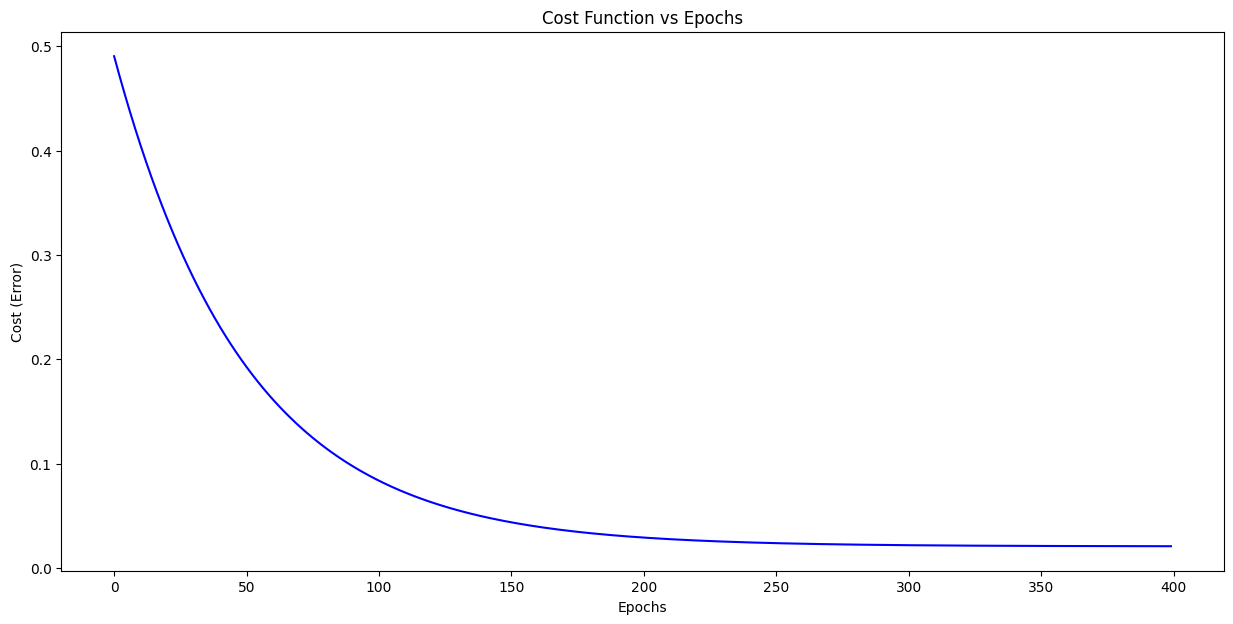

In [423]:
# Plot Results
plt.scatter(indepX, depY, color='red', label='Data Points')
plt.plot(indepX, H, color = 'blue')
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

# Plot Cost Function
plt.plot(range(epochs), cost, color='blue')
plt.xlabel("Epochs")
plt.ylabel("Cost (Error)")
plt.title("Cost Function vs Epochs")
plt.show()

# With split

In [424]:
# Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import pdb (for debugging process)
from sklearn.preprocessing import StandardScaler

# Visualizer Size
plt.rcParams['figure.figsize'] = [15, 7]



In [425]:
# Handeling Data

# Importing Data (Excel)
dataset = pd.read_csv("../datasets/Housing_Data.csv") # path for dataset
indepX = dataset.iloc[:,[0]].values
depY = dataset.iloc[:,[1]].values
    
# Scaling
scale =  StandardScaler()
indepX = scale.fit_transform(indepX)
depY = scale.fit_transform(depY)

# Splitting Data
from sklearn.model_selection import train_test_split
indepX_train, indepX_test, depY_train, depY_test = train_test_split(indepX, depY, 
                                                                    test_size = 0.3, 
                                                                    random_state = 42)

In [426]:
# Hypothesis Function

def hyp(theta, x):
    return theta[0] + theta[1] * x

In [427]:
# Error/Cost Function

def errorFunc(theta, indepX, depY):
    
    # Initialization
    m = len(indepX)
    error = 0
    for i in range(m):
        
        x = indepX[i]
        y = depY[i]
        error += (y - (theta[1] * x + theta[0])) ** 2
        
    return error / (2*m)

In [428]:
# Gradient / Del Function

def grad(indepX, depY, curr_theta, learning_rate):
#     pdb.set_trace()  for debugging process 
    # Initialization
    grad = np.zeros(2)
    new_theta = curr_theta
    m = len(indepX)
    
    # Adjustments
    for i in range(m):
        
        x = indepX[i]
        y = depY[i]
        
        grad[0] += (-1/m) * (y - (curr_theta[0] + (curr_theta[1] * x)))
        grad[1] += (-1/m) * x * (y - (curr_theta[0] + (curr_theta[1] * x)))
    
    temp0 = curr_theta[0] - (learning_rate * grad[0])
    temp1 = curr_theta[1] - (learning_rate * grad[1])
    
    new_theta[0] = temp0
    new_theta[1] = temp1
    
    return new_theta

In [429]:
# Gradient Descent Function

def gradientDescent(indepX,depY, init_theta, learning_rate, num_iterations):
    
    # Initialization
    theta = init_theta
    J = [0 for i in range(num_iterations)]

    # Iterating the Process
    for i in range(num_iterations):
        
        theta = grad(indepX, depY, theta, learning_rate)
        J[i] = errorFunc(theta, indepX, depY)
        
    return theta, J

In [430]:
# Gradient Descent Function

def gradientDescent(indepX,depY, init_theta, learning_rate, num_iterations):
    
    # Initialization
    theta = init_theta
    J = [0 for i in range(num_iterations)]

    # Iterating the Process
    for i in range(num_iterations):
        
        theta = grad(indepX, depY, theta, learning_rate)
        J[i] = errorFunc(theta, indepX, depY)
        
    return theta, J

In [431]:
# Main Function

def main():
    
    # Initialization
    init_theta = np.zeros(2)
    learning_rate = 0.05
    num_iterations = 60
    H = [0 for i in range(len(indepX_train))]
    J = [0 for i in range(num_iterations)]
    
    # Calling Functions
    theta, J = gradientDescent(indepX_train, depY_train, init_theta, learning_rate, num_iterations)
    print("Optimized Theta:", ntheta)
    H = hyp(theta, indepX_train)
    
    # Check
    for i in range(len(depY_test)):
        print(float(H[i]))
        print(depY_test[i])
        print('----------')

    # Visualization
    
    # Visualize J
    plt.plot(J, color = 'green')
    plt.title('Error vs No.Itrerations')
    plt.xlabel('Itrerations')
    plt.ylabel('Cost Function')
    plt.show()
    
    # Visualize H
    plt.scatter(indepX_train, depY_train, color = 'red')
    plt.plot(indepX_train, H, color = 'blue')
    plt.title('Size vs Price (Training set)')
    plt.xlabel('Size')
    plt.ylabel('Price')
    plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12992\120730544.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[0] += (-1/m) * (y - (curr_theta[0] + (curr_theta[1] * x)))
C:\Users\DELL\AppData\Local\Temp\ipykernel_12992\120730544.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[1] += (-1/m) * x * (y - (curr_theta[0] + (curr_theta[1] * x)))
C:\Users\DELL\AppData\Local\Temp\ipykernel_12992\836238282.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p

Optimized Theta: [1.11732845e-16 9.61392688e-01]
-1.16364310060559
[-0.83847041]
----------
1.1671290044209635
[0.97874079]
----------
1.3018506259053089
[0.36825286]
----------
1.34499676611925
[1.57113761]
----------
-0.631800882458239
[-0.50656855]
----------
-1.1293022951291884
[1.87743229]
----------
-0.49003499318386234
[-0.23859989]
----------
0.06470109528109001
[-0.28786532]
----------
0.5710078426895783
[0.5509942]
----------
0.3931400809912919
[-0.48886723]
----------
-1.443652745259328
[-0.83983466]
----------
1.1917839416860725
[-1.27759702]
----------
0.20822805150297452
[0.80132933]
----------
0.548113972371977
[-1.08194194]
----------
-1.172448435343129
[-1.30256868]
----------


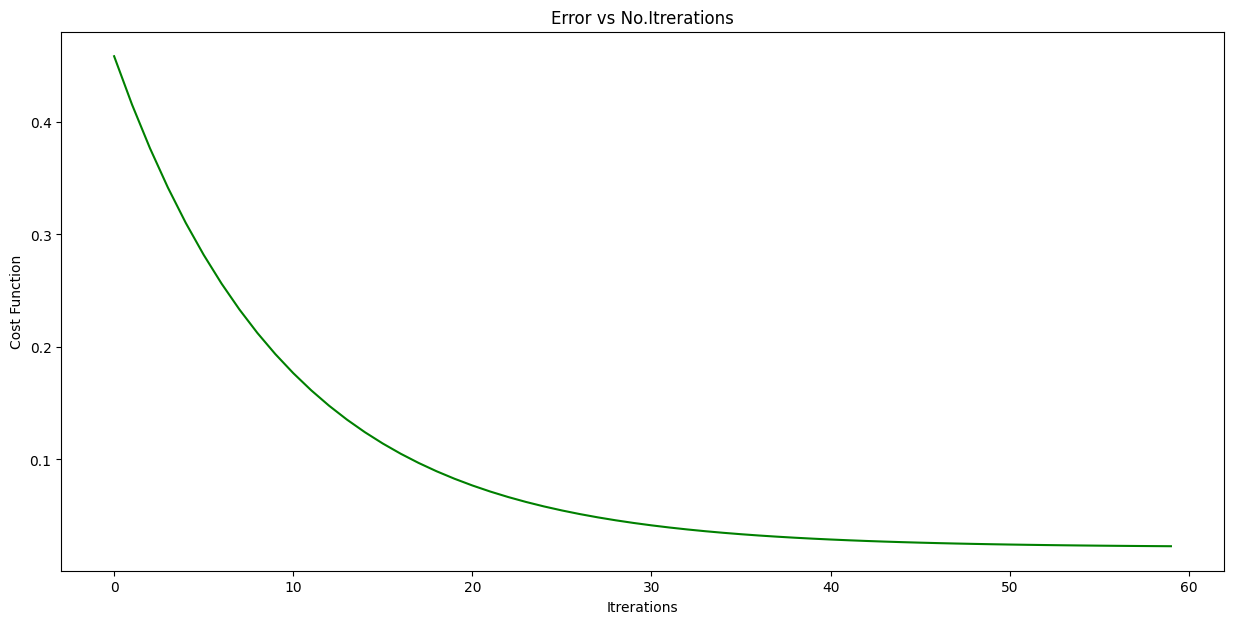

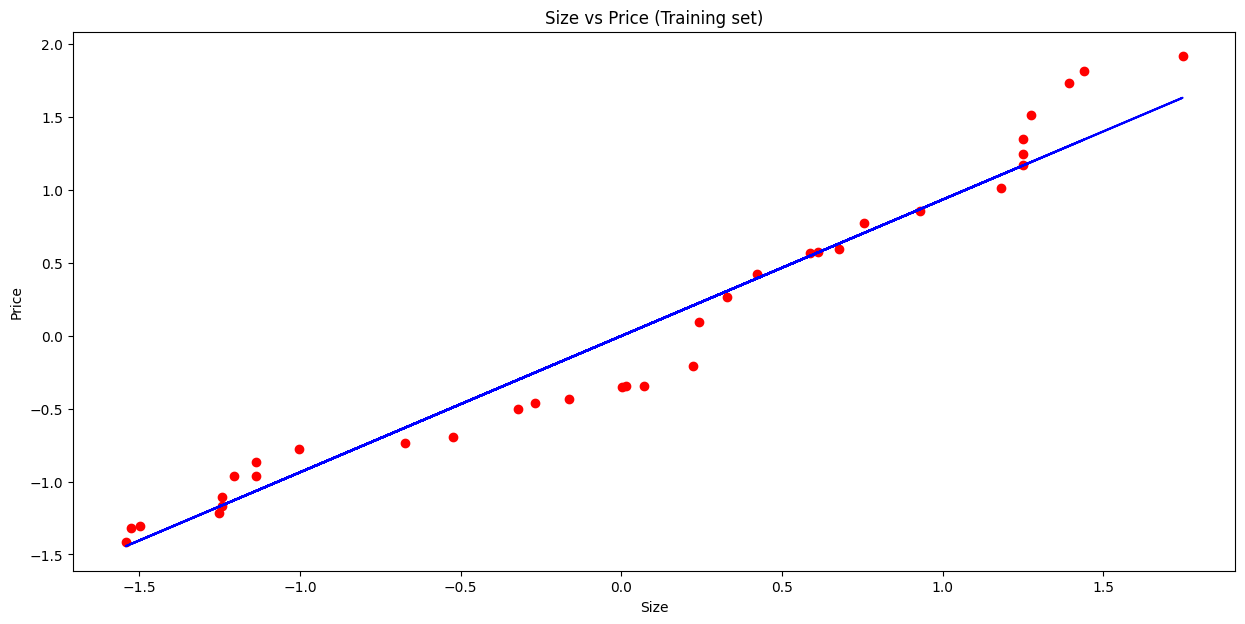

In [432]:
if __name__ == '__main__':
    main()

In [433]:
# Evaluation Metrics
def evaluateModel(y_actual, y_predicted):
    n = len(y_actual)
    
    # MAE
    mae = sum(abs(y_actual[i] - y_predicted[i]) for i in range(n)) / n
    
    # MSE
    mse = sum((y_actual[i] - y_predicted[i]) ** 2 for i in range(n)) / n
    
    # RMSE
    rmse = np.sqrt(mse)
    
    # R²
    mean_y = sum(y_actual) / n
    ss_total = sum((y_actual[i] - mean_y) ** 2 for i in range(n))
    ss_residual = sum((y_actual[i] - y_predicted[i]) ** 2 for i in range(n))
    r2 = 1 - (ss_residual / ss_total)
    
    return mae, mse, rmse, r2

# Test Evaluation
y_actual = [5.5, 6]
y_predicted = [5.4, 6.1]

mae, mse, rmse, r2 = evaluateModel(y_actual, y_predicted)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 0.09999999999999964
MSE: 0.009999999999999929
RMSE: 0.09999999999999964
R²: 0.8400000000000012


# Linear Regression with Gradient Descent and Evaluation Metrics

---

## Main Function for Training and Visualization

```python
import numpy as np
import matplotlib.pyplot as plt

Optimized Theta: [1.06493327 0.91439528]


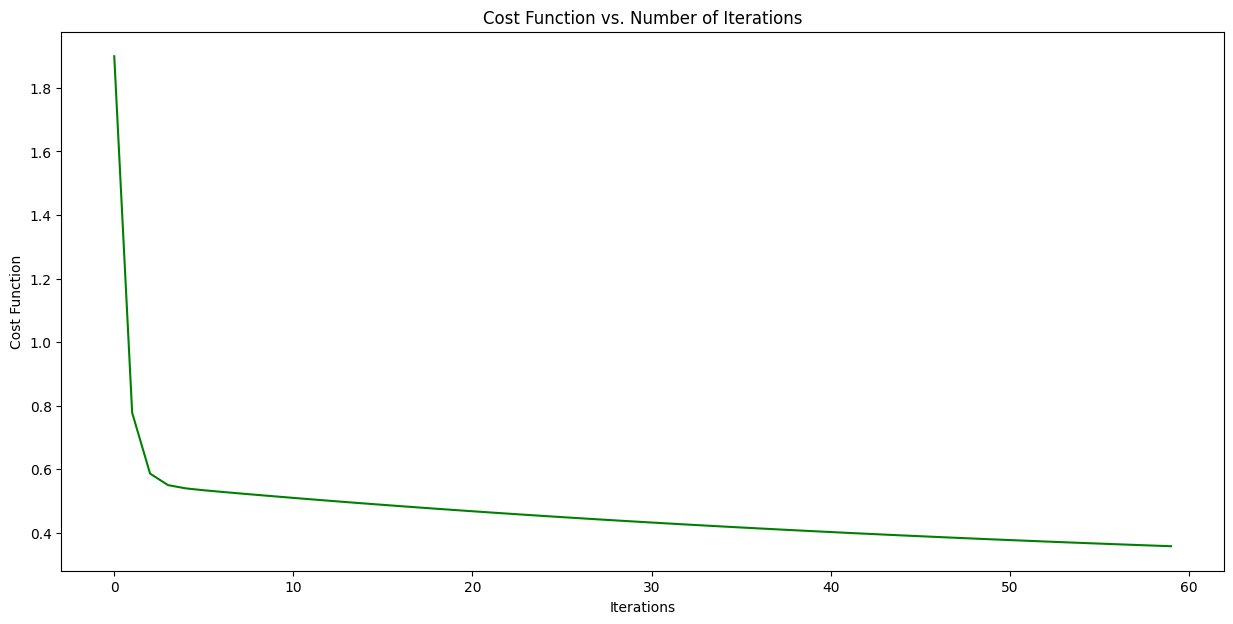

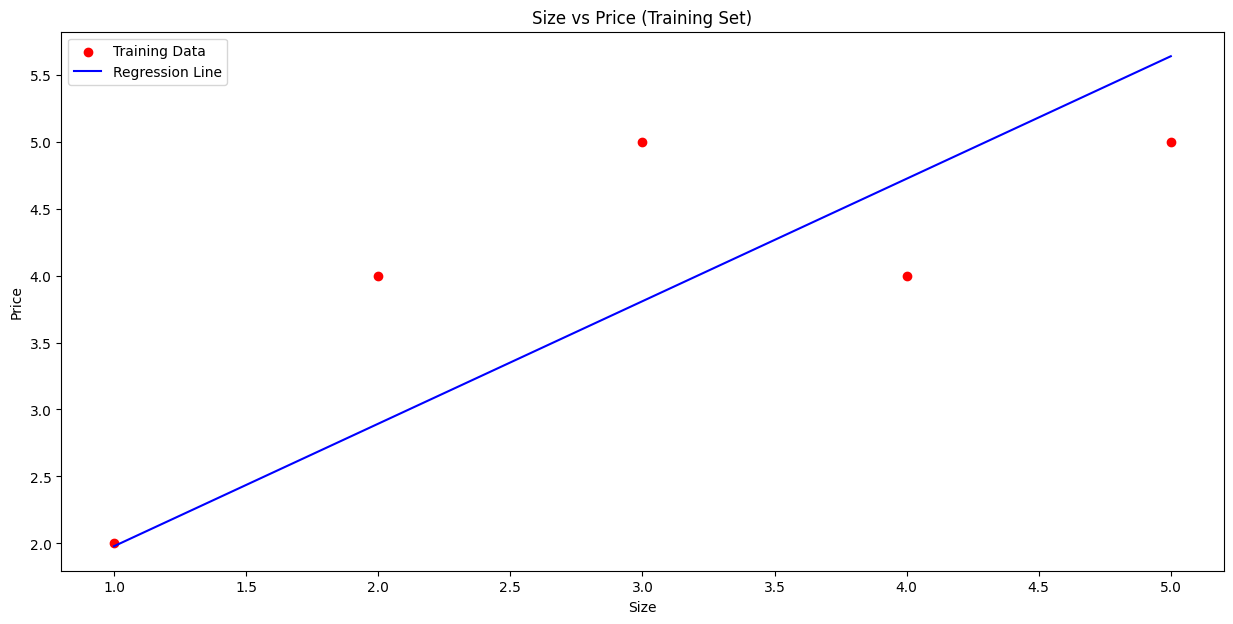

Evaluation Metrics:
MAE: 1.258502608912174
MSE: 1.6267596791474874
RMSE: 1.2754448945946224
R²: -25.0281548663598

Predictions on Test Data:
Predicted: 6.55, Actual: 5.50
Predicted: 7.47, Actual: 6.00


In [434]:


# Hypothesis Function
def hyp(theta, X):
    return [theta[0] + theta[1] * X[i] for i in range(len(X))]

# Cost Function
def costFunction(X, y, theta):
    H = hyp(theta, X)
    return sum((H[i] - y[i]) ** 2 for i in range(len(y))) / (2 * len(y))

# Gradient Descent Function
def gradientDescent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    J = []
    for _ in range(num_iterations):
        H = hyp(theta, X)
        theta[0] -= learning_rate * sum(H[i] - y[i] for i in range(m)) / m
        theta[1] -= learning_rate * sum((H[i] - y[i]) * X[i] for i in range(m)) / m
        J.append(costFunction(X, y, theta))
    return theta, J

# Evaluation Metrics
def evaluateModel(y_actual, y_predicted):
    n = len(y_actual)
    
    # MAE
    mae = sum(abs(y_actual[i] - y_predicted[i]) for i in range(n)) / n
    
    # MSE
    mse = sum((y_actual[i] - y_predicted[i]) ** 2 for i in range(n)) / n
    
    # RMSE
    rmse = np.sqrt(mse)
    
    # R²
    mean_y = sum(y_actual) / n
    ss_total = sum((y_actual[i] - mean_y) ** 2 for i in range(n))
    ss_residual = sum((y_actual[i] - y_predicted[i]) ** 2 for i in range(n))
    r2 = 1 - (ss_residual / ss_total)
    
    return mae, mse, rmse, r2

# Main Function
def main():
    # Training Data
    indepX_train = [1, 2, 3, 4, 5]
    depY_train = [2, 4, 5, 4, 5]
    
    # Test Data
    indepX_test = [6, 7]
    depY_test = [5.5, 6]
    
    # Initialization
    init_theta = np.zeros(2)
    learning_rate = 0.05
    num_iterations = 60
    
    # Calling Gradient Descent
    theta, J = gradientDescent(indepX_train, depY_train, init_theta, learning_rate, num_iterations)
    print("Optimized Theta:", theta)
    
    # Hypothesis (Predicted Values for Training and Test Set)
    H_train = hyp(theta, indepX_train)
    H_test = hyp(theta, indepX_test)
    
    # Visualization
    # Cost Function vs. Iterations
    plt.plot(J, color='green')
    plt.title('Cost Function vs. Number of Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Cost Function')
    plt.show()
    
    # Regression Line on Training Data
    plt.scatter(indepX_train, depY_train, color='red', label='Training Data')
    plt.plot(indepX_train, H_train, color='blue', label='Regression Line')
    plt.title('Size vs Price (Training Set)')
    plt.xlabel('Size')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    
    # Evaluate Model on Test Data
    mae, mse, rmse, r2 = evaluateModel(depY_test, H_test)
    print(f"Evaluation Metrics:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    
    # Check Predictions for Test Data
    print("\nPredictions on Test Data:")
    for i in range(len(depY_test)):
        print(f"Predicted: {H_test[i]:.2f}, Actual: {depY_test[i]:.2f}")

main()
